In [1]:
import numpy as np
from matplotlib.pyplot import *
import plottools as pl
import binning as bins
import prjlib

In [2]:
ps, __ = prjlib.filename_init(doreal='False',rlmin='200',stype='lcmb')
pd, __ = prjlib.filename_init(doreal='False',rlmin='200',stype='dust')
sn = 100
Lmin = 20
mb = bins.multipole_binning(10,spc='p2',lmin=Lmin,lmax=2048)
scb = prjlib.binned_cl_rlz(ps.quad.f['EB'].cl,0,sn,mb)
mcb = np.mean(scb,axis=0)
vcb = np.std(scb,axis=0)
sob = prjlib.binned_cl(ps.quad.f['EB'].ocls,mb)
dob = prjlib.binned_cl(pd.quad.f['EB'].ocls,mb)

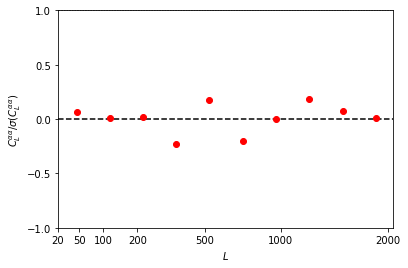

In [5]:
pl.plot_1dstyle(frac=True,spc='p2',ylab=r'$C_L^{\alpha\alpha}/\sigma(C_L^{\alpha\alpha})$',xmin=Lmin,ymin=-1,ymax=1,yticks=[-1,-.5,0,.5,1])
errorbar(np.sqrt(mb.bc),(dob-sob)/vcb,fmt='o',color='r',lw=2)
#legend(loc=0,frameon=False)
savefig('fig_dust.png')